# Практическое задание № 2. Нейронные сети


**Работу выполнил:**

Румянцев Алексей Александрович, 368731, ПИИ R22 бак 1.1 

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже.


### Импорт библиотек
Импортируем необходимые библиотеки:

In [28]:
from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [29]:
path = Path().resolve()
train_data = pd.read_csv(os.path.join(path, 'train.csv'))
test_data = pd.read_csv(os.path.join(path, 'test.csv'))

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [30]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [32]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():

            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [33]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [34]:
missing_value_checker(test_edited)

[]
0


In [35]:
missing_value_checker(train_edited)

[]
0


In [36]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [37]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [38]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [39]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [40]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

## Моделирование

### Построение и обучение модели


Создайте последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow.

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def get_seq_model(in_dim: int, out_dim: int, hid_dim: int = None,
                  hid_num: int = None, act: str = "relu", seed: int = 40):
    if in_dim <= 0:
        raise ValueError("Input dimension must be greater than 0.")
    if out_dim <= 0:
        raise ValueError('Output dimension must be greater than 0.')
    model = keras.Sequential()
    model.add(layers.Dense(in_dim, activation = act))
    if hid_dim is not None or hid_num is not None:
        if hid_dim is None or hid_dim <= 0:
            hid_dim = in_dim
        if hid_num is None or hid_num <= 0:
            hid_num = 1
        for _ in range(hid_num):
            model.add(layers.Dense(hid_dim, activation = act))
    model.add(layers.Dense(out_dim, activation = "linear"))

    tf.random.set_seed(seed)
    
    return model


in_sz = 150
out_sz = 1
simple_model = get_seq_model(in_dim=in_sz, out_dim=out_sz)

Скомпилируйте нейронную сеть, выбрав функцию потерь и оптимизатор соответственно.

In [42]:

simple_model.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

Обучите модель на обучающих данных `X_train` и `y_train` задав гиперпараметры вашей модели нейронной сети, например количество эпох (epochs), размер мини-выборки (batch_size) и другие.

In [43]:
simple_history = simple_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 20.9286
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9403 
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1420
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1320
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7798
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8613
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2373
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7925
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4625
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2103
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0131
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8563
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7300
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6272
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5428
Epoch 16/20
37/3

**Оцените полученные результаты**

{'loss': [15.844000816345215, 9.170735359191895, 6.597166538238525, 4.769822120666504, 3.526901960372925, 2.689584255218506, 2.114410877227783, 1.7005077600479126, 1.3911855220794678, 1.153437852859497, 0.9668221473693848, 0.8179787397384644, 0.6977790594100952, 0.5997560024261475, 0.5191839337348938, 0.4497213363647461, 0.3812975287437439, 0.32134851813316345, 0.2719263434410095, 0.22737950086593628]}


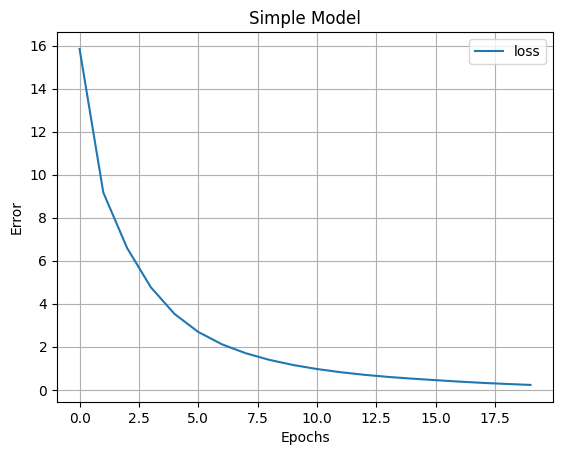

In [44]:
def show_loss(history, name: str = None):
    pd.DataFrame(history.history).plot()
    plt.ylabel('Error')
    plt.xlabel('Epochs')
    plt.title(name)
    plt.grid(True)


show_loss(simple_history, name='Simple Model')
print(simple_history.history)

In [45]:
simple_scores = simple_model.evaluate(X_val, y_val, verbose=1)
simple_scores

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1855


0.21633844077587128

### Прогнозирование

In [46]:
simple_preds = simple_model.predict(test_edited)
simple_preds

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[129159.7 ],
       [188139.36],
       [148093.83],
       ...,
       [187945.38],
       [128788.45],
       [136820.02]], dtype=float32)

In [47]:
def get_output(preds):
    output = pd.DataFrame(
    {
        'Id': test_data['Id'],
        'OverAllCond': test_data['OverallCond'],
        'SaleCondition': test_data['SaleCondition'],
        'SalePrice': np.squeeze(preds)
    })
    return output


simple_ans = get_output(simple_preds)
simple_ans

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,129159.703125
1,1462,6,Normal,188139.359375
2,1463,5,Normal,148093.828125
3,1464,6,Normal,127738.101562
4,1465,5,Normal,100561.984375
...,...,...,...,...
1454,2915,7,Normal,77171.515625
1455,2916,5,Abnorml,78395.453125
1456,2917,7,Abnorml,187945.375000
1457,2918,5,Normal,128788.453125


## Эксперименты

Будем эксперементировать со значениями различных параметров. Создание, компиляция, обучение модели, построение графика функции потерь и прогноз ищутся аналогично ранее проделанным шагам.

**Попробуйте использовать разное количество нейронов на входном слое. Опишите достигнутый результат.**

Сравним количество нейронов на входном слое: 150, 500, 1000. Нейроны работают так: нейрон получает входные значения $x_i$ от других нейронов или исходных данных, каждое входное значение умножается на свой вес, который определяет важность входа; считается взвешенная сумма входов, к результату применяется функция активации, чтобы преобразовать его в выходной сигнал. Входные нейроны получают данные и без выполнения сложных вычислений передают их дальше. Выходные нейроны формируют конечный результат модели. Модель без скрытых слоев будет плохо моделировать сложные зависимости. В данной лабораторной работе создаем полносвязную нейронную сеть (каждый нейрон соединён с каждым нейроном предыдущего и следующего слоёв).

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 21.2919
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4631
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7209
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8120
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8247
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2496
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8896
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6475
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4827
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3704
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2928
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2385
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2003
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1731
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1529
Epoch 16/20
37/37

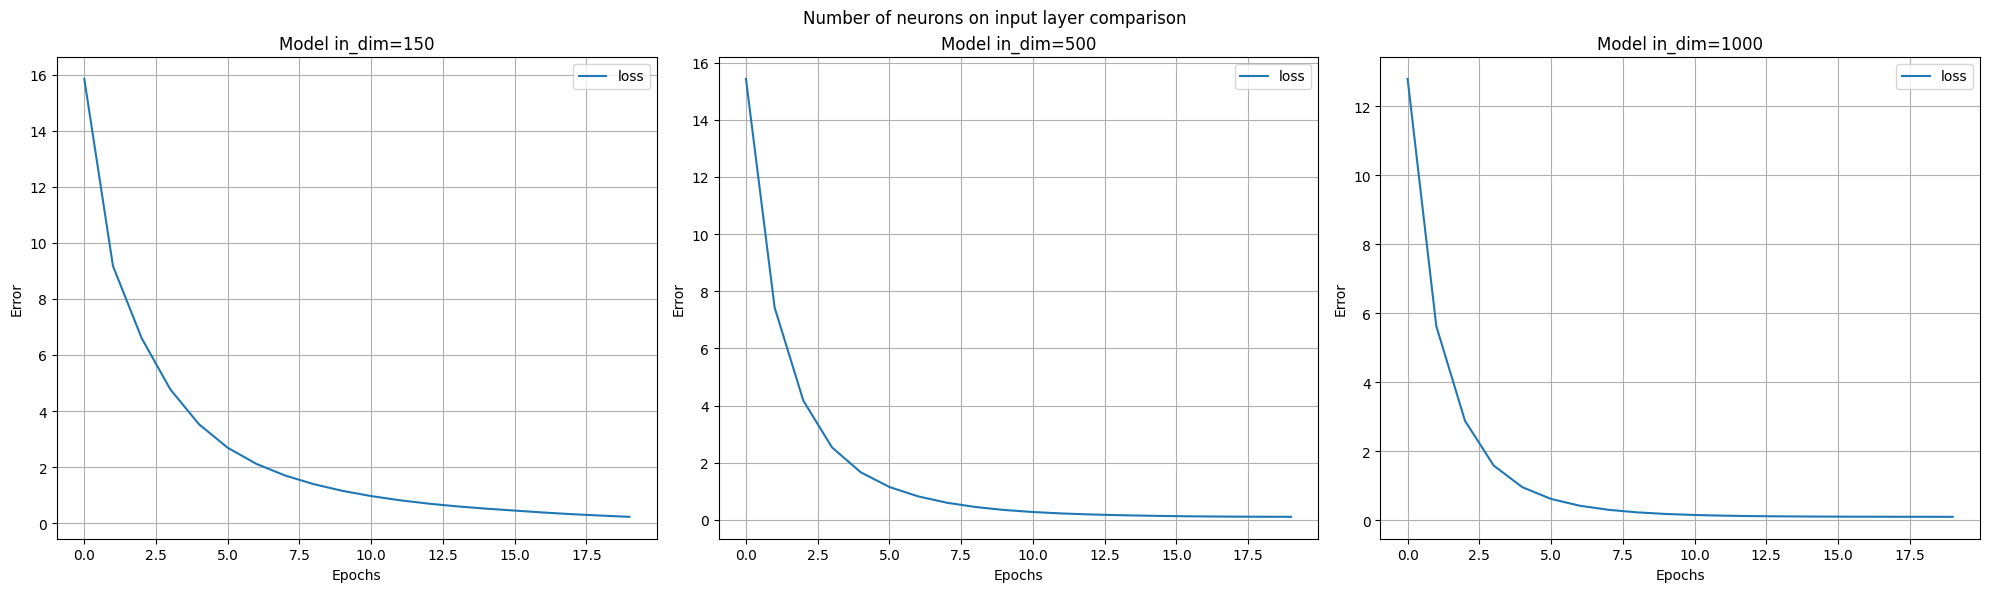

In [56]:
def show_loss3(history1, history2, history3, ttl, name1, name2, name3):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    pd.DataFrame(history1.history).plot(ax=axes[0])
    axes[0].set_title(f'{name1}')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Error')
    axes[0].grid(True)
    pd.DataFrame(history2.history).plot(ax=axes[1])
    axes[1].set_title(f'{name2}')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Error')
    axes[1].grid(True)
    pd.DataFrame(history3.history).plot(ax=axes[2])
    axes[2].set_title(f'{name3}')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Error')
    axes[2].grid(True)

    fig.suptitle(ttl)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9) 


in_sz = 500 # Input layer dim (150->500)
out_sz = 1
model_in_500 = get_seq_model(in_dim=in_sz, out_dim=out_sz)
model_in_500.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())
history_in_500 = model_in_500.fit(X_train, y_train, epochs=20, batch_size=32)
scores_in_500 = model_in_500.evaluate(X_val, y_val, verbose=1)
preds_in_500 = model_in_500.predict(test_edited)
ans1 = get_output(preds_in_500)

in_sz = 1000 # Input layer dim (500->1000)
model_in_1000 = get_seq_model(in_dim=in_sz, out_dim=out_sz)
model_in_1000.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())
history_in_1000 = model_in_1000.fit(X_train, y_train, epochs=20, batch_size=32)
scores_in_1000 = model_in_1000.evaluate(X_val, y_val, verbose=1)
preds_in_1000 = model_in_1000.predict(test_edited)
ans2 = get_output(preds_in_1000)

name1, name2, name3 = 'Model in_dim=150', 'Model in_dim=500', 'Model in_dim=1000'
print(f'scores_in_150={simple_scores}\nscores_in_500={scores_in_500}\nscores_in_1000={scores_in_1000}')
print(simple_ans)
print(ans1)
print(ans2)
show_loss3(simple_history, history_in_500, history_in_1000, 'Number of neurons on input layer comparison', name1, name2, name3)

С увеличением нейронов на входном слое функция потерь быстрее убывает, то есть уменьшается ошибка.

**Добавьте в нейронную сеть скрытый слой с разным количеством нейронов.**

Добавим один скрытый слой с разным количеством нейронов. Сравним: 150, 500, 1000. Скрытые нейроны обрабатывают данные сложными вычислениями. Каждое соединение между нейронами включает обучаемые веса и смещения.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 17.2717
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5125
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5928
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5228
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2090
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1386
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1278
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1257
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1238
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1219
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1198
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1176
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1153
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1130
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1106
Epoch 16/20
37/37

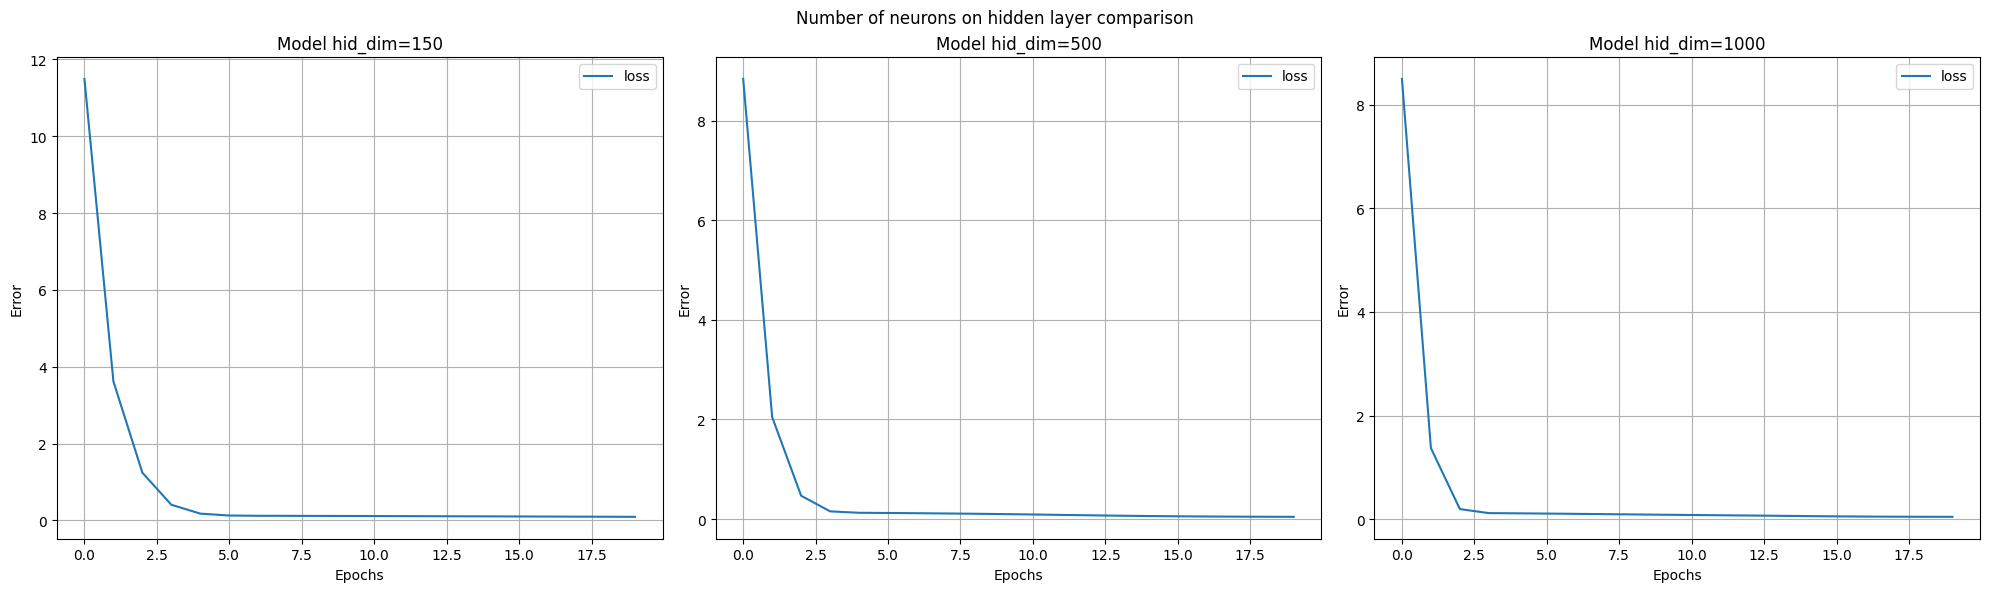

In [58]:
in_sz = 150
hid_sz = 150 # Hidden layer dim
out_sz = 1
model_hid_150 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_150.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())
history_hid_150 = model_hid_150.fit(X_train, y_train, epochs=20, batch_size=32)
scores_hid_150 = model_hid_150.evaluate(X_val, y_val, verbose=1)
preds_hid_150 = model_hid_150.predict(test_edited)
anshh1 = get_output(preds_hid_150)

hid_sz = 500 # Hidden layer dim (150->500)
model_hid_500 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_500.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())
history_hid_500 = model_hid_500.fit(X_train, y_train, epochs=20, batch_size=32)
scores_hid_500 = model_hid_500.evaluate(X_val, y_val, verbose=1)
preds_hid_500 = model_hid_500.predict(test_edited)
ans2 = get_output(preds_hid_500)

hid_sz = 1000 # Hidden layer dim (500->1000)
model_hid_1000 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_1000.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())
history_hid_1000 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=32)
scores_hid_1000 = model_hid_1000.evaluate(X_val, y_val, verbose=1)
preds_hid_1000 = model_hid_1000.predict(test_edited)
ans3 = get_output(preds_hid_1000)

name1, name2, name3 = 'Model hid_dim=150', 'Model hid_dim=500', 'Model hid_dim=1000'
print(f'scores_hid_150={scores_hid_150}\nscores_hid_500={scores_hid_500}\nscores_hid_1000={scores_hid_1000}')
print(anshh1)
print(ans2)
print(ans3)
show_loss3(history_hid_150, history_hid_500, history_hid_1000, 'Number of neurons on hidden layer comparison', name1, name2, name3)

При увеличении нейронов скрытых слоев функция потерь быстрее убывает, следовательно ошибка уменьшается.

**Используйте разное количество эпох. Опишите достигнутый результат.**

Сравним различное количество эпох: 10, 20, 50. Эпоха -- полный проход всей обучающей выборки через модель.

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0387
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0386
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0385
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0384
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0384
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0382
Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0382
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0381
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0379
Epoch 6/50
37/37 ━━━━━━━

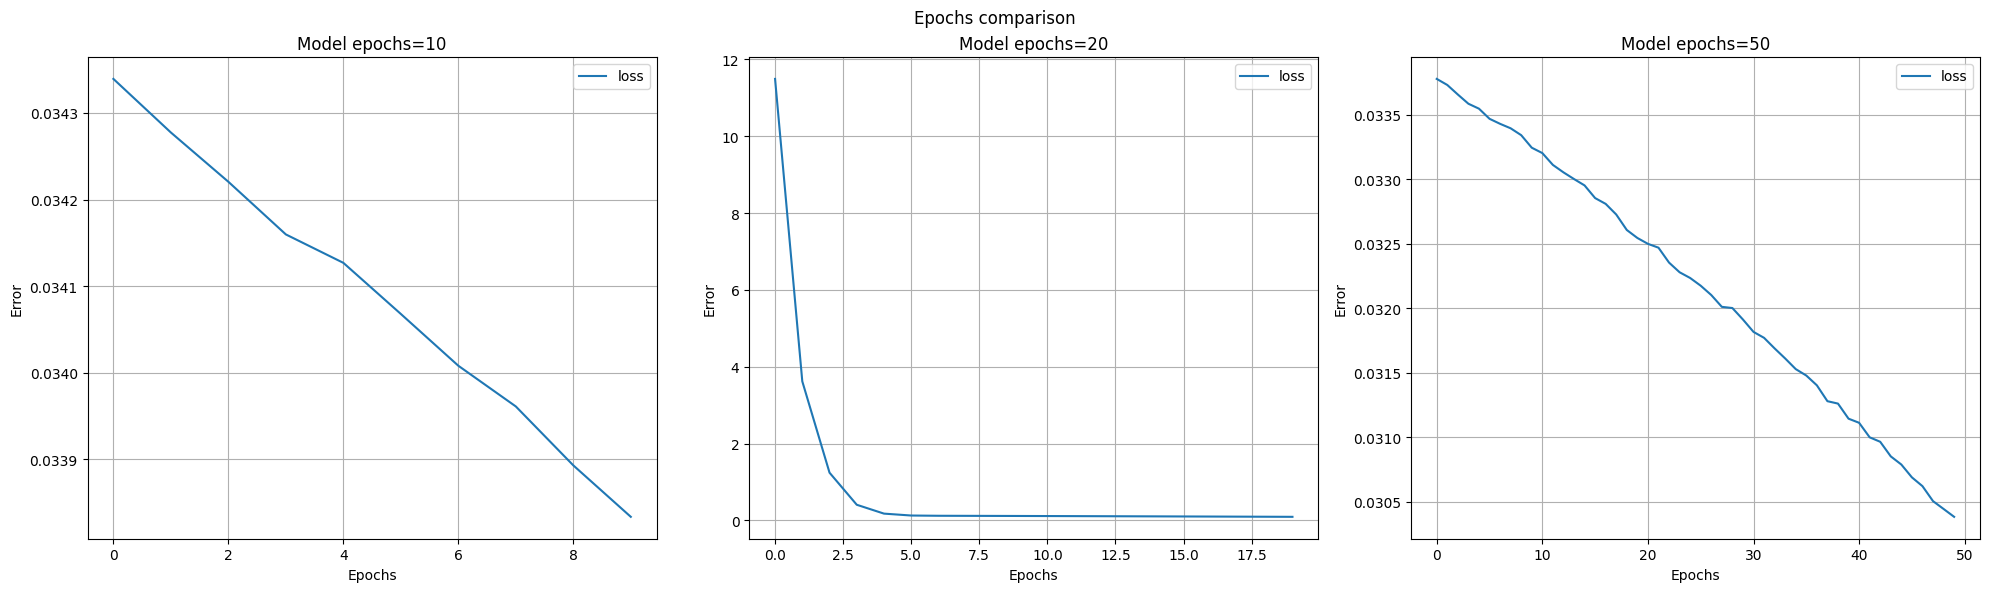

In [63]:
history_hid_150_2 = model_hid_150.fit(X_train, y_train, epochs=10, batch_size=32)
history_hid_150_3 = model_hid_150.fit(X_train, y_train, epochs=50, batch_size=32)
name1, name2, name3 = 'Model epochs=10', 'Model epochs=20', 'Model epochs=50'
show_loss3(history_hid_150_2, history_hid_150, history_hid_150_3, 'Epochs comparison', name1, name2, name3)

При маленьком количестве эпох потери уменьшаются только частично, график нерегулярный -- модель не успевала стабилизироваться -- недостаточное обучение. При большом количестве эпох модель подгоняется под шум и выбросы данных. Среднее значение дало наилучший результат.

**Используйте разные размеры мини-выборки (batch_size). Опишите достигнутый результат.**

Сравним различные размеры мини-выборок: 10, 32, 100. Батч -- подмножество данных, которое используется для одного шага обучения нейронной сети. Вместо того чтобы обновлять веса модели после прохождения через весь тренировочный набор данных, обновление происходит после обработки одной порции данных (батча).

Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0446
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0444
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0442
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0441
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0440
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0439
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0436
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0436
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0434
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0434
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0432
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0432
Epoch 13/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0430
Epoch 14/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0430
Epoch 15/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

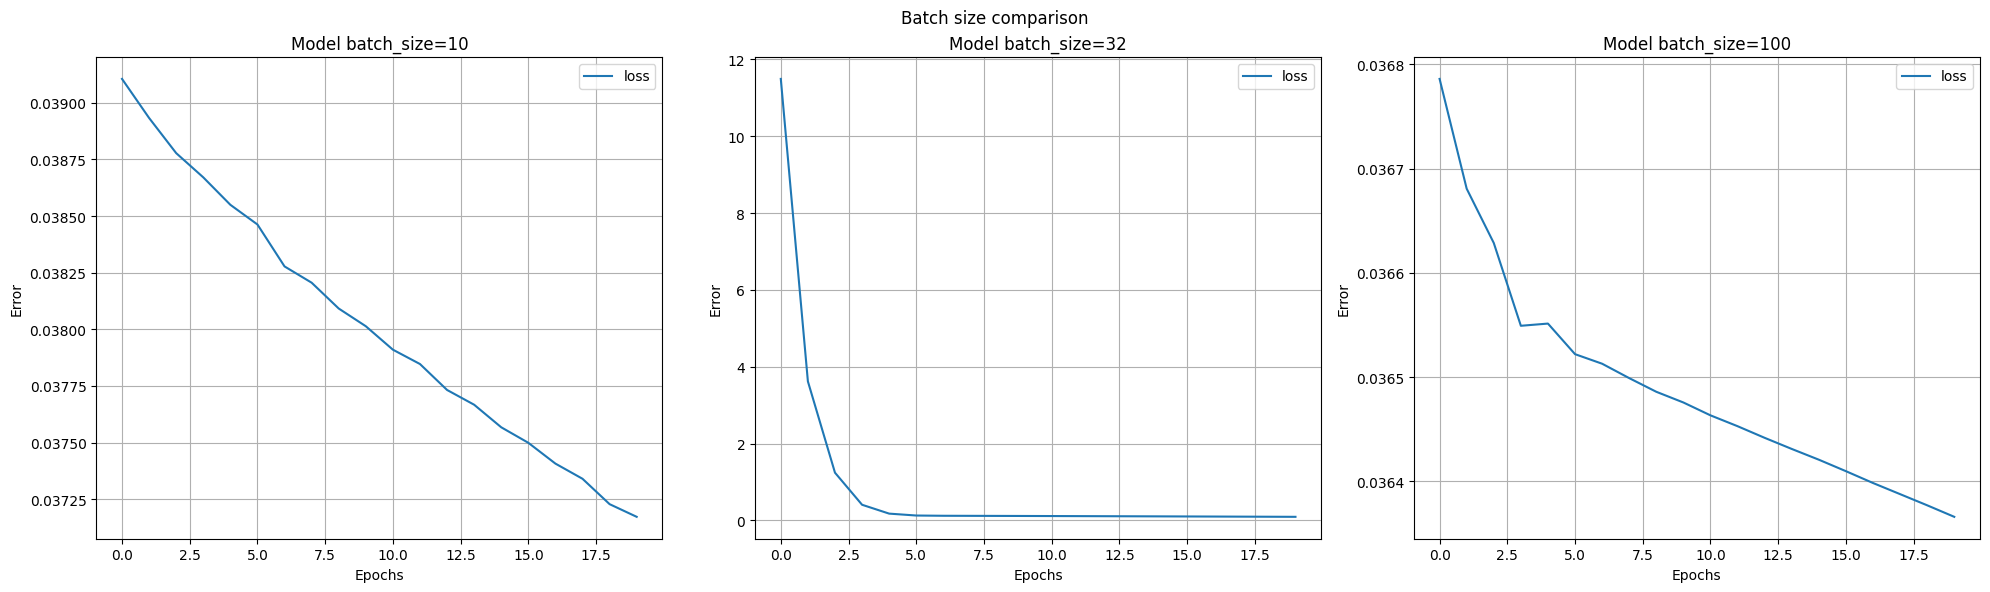

In [61]:
history_hid_150_4 = model_hid_150.fit(X_train, y_train, epochs=20, batch_size=10)
history_hid_150_5 = model_hid_150.fit(X_train, y_train, epochs=20, batch_size=100)
name1, name2, name3 = 'Model batch_size=10', 'Model batch_size=32', 'Model batch_size=100'
show_loss3(history_hid_150_4, history_hid_150, history_hid_150_5, 'Batch size comparison', name1, name2, name3)

При маленьком `batch_size` появляются флуктации в градиентах, так как они зависят от небольших случайных выборок. Весы часто обновляются, для хорошего результата нужно увеличить количество эпох. При среднем значении график нормальный. При больших значениях веса обновляются слишком редко, модель хуже адаптируется к локальным особенностям данных.

**Попробуйте использовать разные значения оптимизатора `optimizers` и функции потерь `loss`. Сравните полученные результаты.**

Сравним оптимизаторы `sgd`, `rmsprop` и `adam`. Оптимизаторы управляют тем, как модель обновляет свои параметры (веса и смещения), чтобы минимизировать функцию потерь и улучшить предсказания.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 18.4651
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8050
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3844
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2559
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2068
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1859
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1762
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1715
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1689
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1673
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1663
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1655
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1648
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1641
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1636
Epoch 16/20
37/37

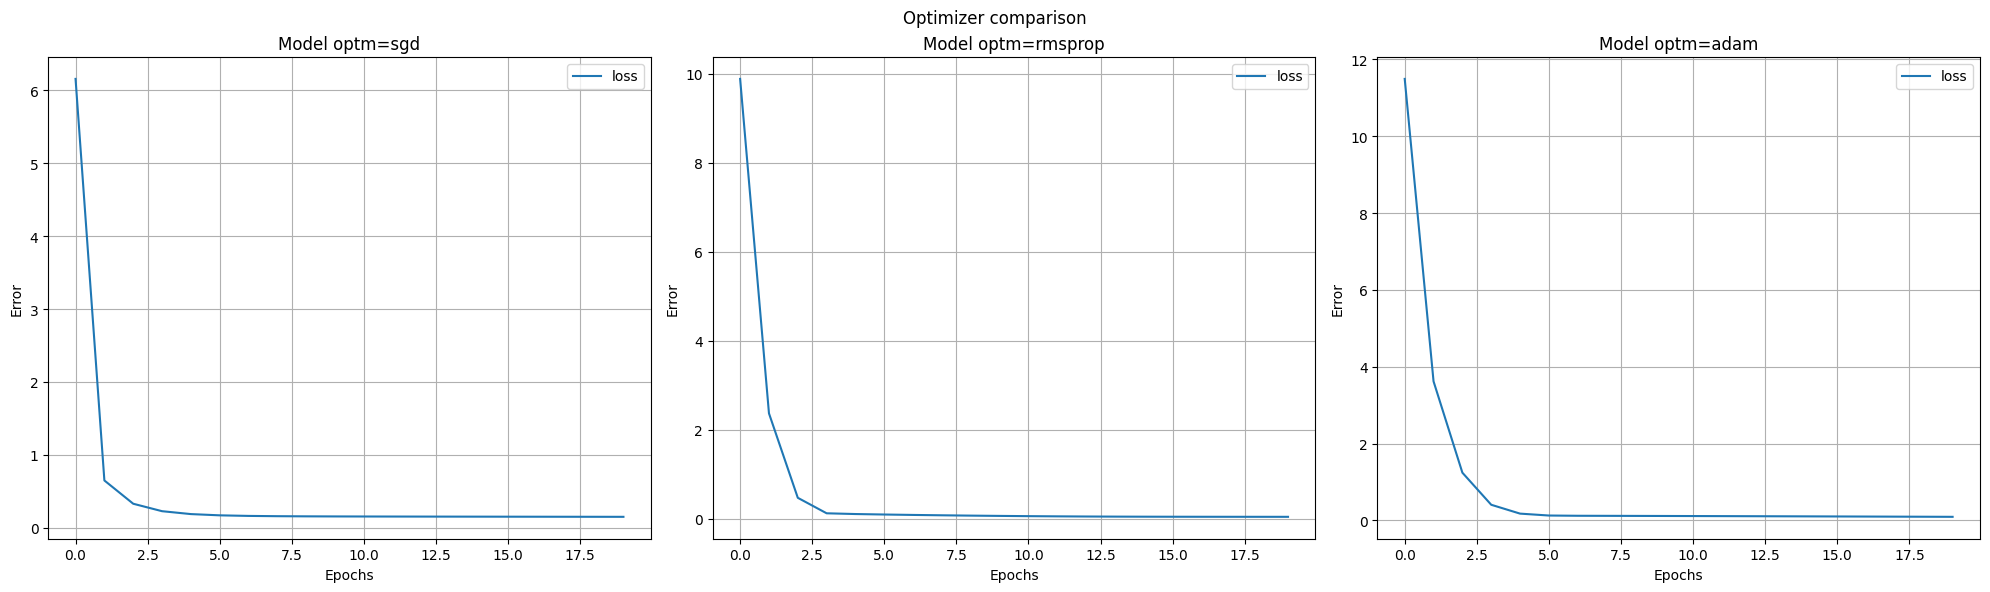

In [69]:
in_sz = 150
hid_sz = 150
out_sz = 1
model_hid_150_new = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_150_new.compile(optimizer='sgd', loss=keras.losses.MeanSquaredLogarithmicError()) # Optimizer
history_hid_150_new = model_hid_150_new.fit(X_train, y_train, epochs=20, batch_size=32)
scores_hid_150_new = model_hid_150_new.evaluate(X_val, y_val, verbose=1)
preds_hid_150_new = model_hid_150_new.predict(test_edited)
ans1 = get_output(preds_hid_150_new)

model_hid_150_new_2 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_150_new_2.compile(optimizer='rmsprop', loss=keras.losses.MeanSquaredLogarithmicError()) # Optimizer
history_hid_150_new_2 = model_hid_150_new_2.fit(X_train, y_train, epochs=20, batch_size=32)
scores_hid_150_new_2 = model_hid_150_new_2.evaluate(X_val, y_val, verbose=1)
preds_hid_150_new_2 = model_hid_150_new_2.predict(test_edited)
ans2 = get_output(preds_hid_150_new_2)

name1, name2, name3 = 'Model optm=sgd', 'Model optm=rmsprop', 'Model optm=adam'
print(f'scores_hid_150_new={scores_hid_150_new}\nscores_hid_150_new_2={scores_hid_150_new_2}\nscores_hid_150={scores_hid_150}')
print(ans1)
print(ans2)
print(anshh1)
show_loss3(history_hid_150_new, history_hid_150_new_2, history_hid_150, 'Optimizer comparison', name1, name2, name3)

Лучше всего получился результат с `rmsprop`, хуже всего с `sgd`, `adam` посередине.

Сравним функции потерь `MAE`, `Huber` и `MSLE`. Функция потерь — это математическая метрика, которая измеряет разницу между предсказанием модели и истинным значением. Она служит индикатором того, насколько хорошо модель справляется с задачей. Используется оптимизатором для вычисления градиентов и обновления параметров модели.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 175918.0156
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 108302.8203
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52349.8242
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47704.5469
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44475.8711
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41420.4141
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38455.1250
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35798.7891
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33983.7344
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32502.0215
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31682.0723
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30968.8750
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30573.5117
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30409.3809
Epoch 15/20
37/37 ━━━━━━━━

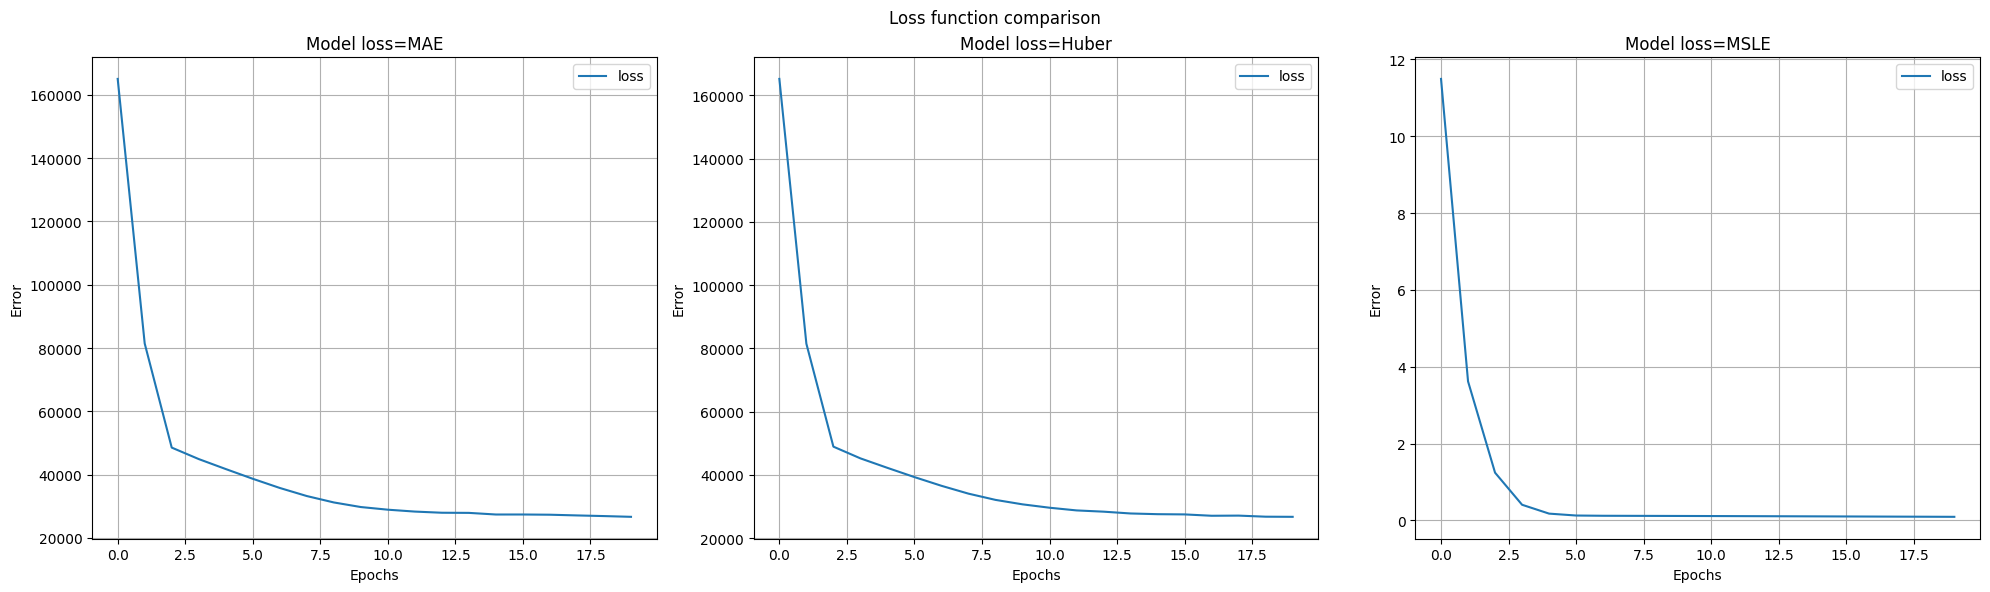

In [70]:
in_sz = 150
hid_sz = 150
out_sz = 1
model_hid_150_new = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_150_new.compile(optimizer='adam', loss=keras.losses.MeanAbsoluteError())
history_hid_150_new = model_hid_150_new.fit(X_train, y_train, epochs=20, batch_size=32)
scores_hid_150_new = model_hid_150_new.evaluate(X_val, y_val, verbose=1)
preds_hid_150_new = model_hid_150_new.predict(test_edited)
ans1 = get_output(preds_hid_150_new)

model_hid_150_new_2 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_150_new_2.compile(optimizer='adam', loss=keras.losses.Huber()) 
history_hid_150_new_2 = model_hid_150_new_2.fit(X_train, y_train, epochs=20, batch_size=32)
scores_hid_150_new_2 = model_hid_150_new_2.evaluate(X_val, y_val, verbose=1)
preds_hid_150_new_2 = model_hid_150_new_2.predict(test_edited)
ans2 = get_output(preds_hid_150_new_2)

name1, name2, name3 = 'Model loss=MAE', 'Model loss=Huber', 'Model loss=MSLE'
print(f'scores_hid_150_new={scores_hid_150_new}\nscores_hid_100_new_2={scores_hid_150_new_2}\nscores_hid_150={scores_hid_150}')
print(ans1)
print(ans2)
print(anshh1)
show_loss3(history_hid_150_new, history_hid_150_new_2, history_hid_150, 'Loss function comparison', name1, name2, name3)

Результат с `MSLE` получился более "спокойный" вследствие логарифмирования. `Huber` (комбинация `MAE` и `MSE`) и `MAE` очень похожи друг на друга.

## Вывод

Исходя из результатов, для итоговой модели лучше всего использовать параметры `rmsprop`, `MSLE`, 20 эпох, 32 мини-выборки, входной слой с 500 нейронами, 1 скрытый слой с 1000 нейронами, выходной слой с 1 нейроном.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 19.3418
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3532
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1432
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1190
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0955
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0782
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0507
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0494
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0483
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0480
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0477
Epoch 16/20
37/37

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,136942.812500
1,1462,6,Normal,164630.593750
2,1463,5,Normal,181841.062500
3,1464,6,Normal,181352.406250
4,1465,5,Normal,159269.406250
...,...,...,...,...
1454,2915,7,Normal,90606.476562
1455,2916,5,Abnorml,109154.312500
1456,2917,7,Abnorml,182860.234375
1457,2918,5,Normal,97034.421875


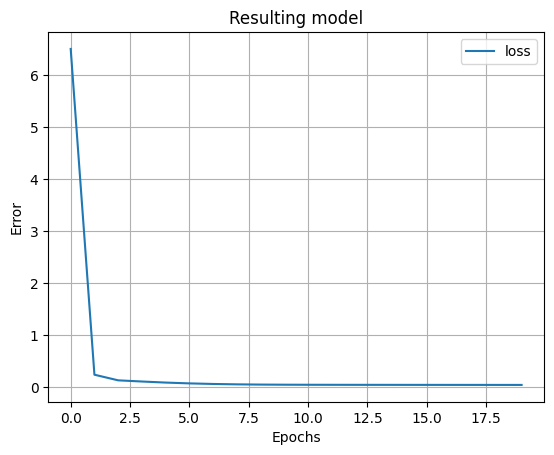

In [74]:
res_model = get_seq_model(in_dim=500, out_dim=1, hid_dim=1000)
res_model.compile(optimizer='rmsprop', loss=keras.losses.MeanSquaredLogarithmicError())

res_history = res_model.fit(X_train, y_train, epochs=20, batch_size=32)
res_scores = res_model.evaluate(X_val, y_val, verbose=1)

res_preds = res_model.predict(test_edited)
res = get_output(res_preds)

print(f'res_scores={res_scores}')
show_loss(res_history, 'Resulting model')
res

## Вопросы

**Что такое эпоха (Epoch)? В чем отличие от итерации (Iteration)?**

Эпоха — это один полный проход по всему набору данных, используемых для обучения модели. Во время одной эпохи модель обучается на всех обучающих примерах. Если данные большие, то они могут быть разбиты на меньшие части, называемые батчами. Одна эпоха может состоять из нескольких итераций, если данные разбиты на батчи. Итерация — это один шаг процесса обучения, который соответствует обработке одного батча данных. В каждой итерации модель обновляет свои веса, используя информацию из текущего батча. Число итераций на одну эпоху зависит от размера данных и размера батча.

**Что такое функция активации? Какие вам известны? Как и зачем используются в нейронной сети?**

Функция активации — это математическая функция, которая используется в нейронных сетях для преобразования входного сигнала нейрона (взвешенной суммы входных данных) в выходной сигнал. Функция активации определяет, будет ли нейрон "активирован" (то есть, передаст ли он сигнал дальше в сети), или нет, основываясь на входных данных. Функции активации управляют потоком информации между нейронами. Они помогают решать, какую информацию нейрон должен передавать в следующий слой, а какую — отбросить. Без функции активации нейронная сеть будет действовать как линейная модель, даже если в ней много слоёв. Таким образом, функции активации позволяют нейронной сети обучаться более сложным, нелинейным зависимостям в данных. Виды: сигмоида, гиперболический тангенс, ReLU.

**Что такое MSE(Mean Squared Error) - Средняя квадратичная ошибка? Что такое MAE(Mean Absolute Error)? Для чего используются.**

MSE — это среднее значение квадратов ошибок предсказаний модели. Ошибка считается как разница между реальным значением и предсказанным значением. Квадрат ошибки усиливает влияние крупных отклонений (MSE чувствительным к выбросам). MSE часто используется в оптимизации моделей, таких как линейная регрессия или нейронные сети, так как оно является дифференцируемым и дает гладкую кривую потерь, что помогает эффективно обучать модели. MAE — это среднее значение абсолютных ошибок предсказаний модели. Ошибка в данном случае считается как разница между реальным и предсказанным значением, но без возведения в квадрат. MAE измеряет среднюю величину ошибок без учета их направления (положительное или отрицательное), и не усиливает влияние больших ошибок так, как это делает MSE (MAE более устойчив к выбросам). MAE используется в случаях, когда важно, чтобы ошибка предсказания была в одинаковой степени чувствительна ко всем отклонениям.